In [40]:
import pandas as pd
cdf = pd.read_csv("Clean_Dataset.csv")
#학습 시간 단축을 위해 5000건만 추출
cdf = cdf[:5000]
cdf.head(1)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953


In [41]:
#Unnamed: 0 데이터 분포 확인하기
cdf["Unnamed: 0"].value_counts()
#Unnamed 칼럼 삭제하기
cdf.drop("Unnamed: 0", axis=1, inplace=True)

In [42]:
cdf.describe(include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,5000,5000,5000,5000,5000,5000,5000,5000,5000.000000,5000.000000,5000.000000
unique,6,222,1,6,3,6,1,1,NaN,NaN,NaN
top,Vistara,UK-819,Delhi,Evening,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,1496,90,5000,1391,3619,1702,5000,5000,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.665682,14.216800,7589.786600
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.247512,7.109536,4476.362204
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,2409.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.330000,8.000000,4678.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.670000,14.000000,5955.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.080000,20.000000,10549.000000


In [43]:
#Info를 통해 NULL 데이터 및 type 있는지 1차 확인하기(isna도 가능)
print("Null 데이터 확인")
cdf.info()

Null 데이터 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           5000 non-null   object 
 1   flight            5000 non-null   object 
 2   source_city       5000 non-null   object 
 3   departure_time    5000 non-null   object 
 4   stops             5000 non-null   object 
 5   arrival_time      5000 non-null   object 
 6   destination_city  5000 non-null   object 
 7   class             5000 non-null   object 
 8   duration          5000 non-null   float64
 9   days_left         5000 non-null   int64  
 10  price             5000 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 429.8+ KB


In [44]:
#첫 번째 칼럼이 의미 있는 칼럼인지 확인하기 위해 value_count로 분포 확인하기
cdf.airline.value_counts()

Vistara      1496
Air_India    1311
Indigo        813
GO_FIRST      801
SpiceJet      296
AirAsia       283
Name: airline, dtype: int64

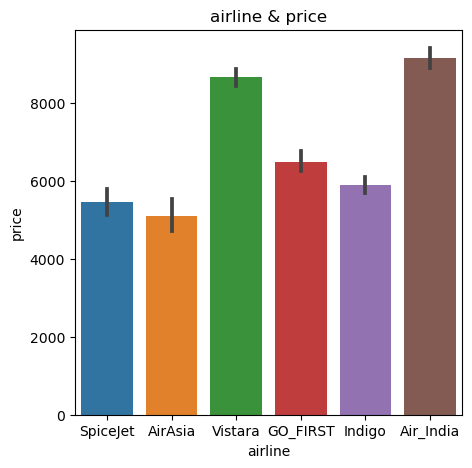

In [45]:
#위에서 6개의 항공사가 있다는 것 확인. 가격과 연관성이 있는지 그래프 통해 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
ax = sns.barplot(x='airline', y='price', data=cdf)
ax.set(title='airline & price')
plt.show()

In [46]:
# 그래프를 보면 Vistara와 Air_India 가격이 높은 거 확인 가능. 우선 airline 칼럼은 유지

In [47]:
#다음은 flight 칼럼 분석
cdf.head(1)
cdf.flight.value_counts()

UK-819     90
UK-879     62
UK-899     61
UK-705     61
UK-835     60
           ..
AI-9939     2
I5-881      2
I5-744      1
SG-9974     1
SG-8339     1
Name: flight, Length: 222, dtype: int64

In [48]:
#항공평 명은 해당 비행기가 어디로 가는지 제공한다. 하지만 출발지, 도착지, 거리 칼럼이 또 있기 때문에 flight는 삭제
cdf.drop('flight', axis=1, inplace=True)
cdf.shape

(5000, 10)

In [49]:
#info 정보에서 확인한 object형 변수를 원핫 인코딩 진행.(데이터의 수치화)
dummies_cdf = pd.get_dummies(cdf,
                columns=['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class'],
                drop_first=True)
#인코딩 확인
print(f'''원핫 인코딩 전{cdf.shape}
원핫 인코딩 후 {dummies_cdf.shape}''')

원핫 인코딩 전(5000, 10)
원핫 인코딩 후 (5000, 20)


In [50]:
#데이터프레임에서 타깃 변수만 y로 추출하기
y = dummies_cdf.price
y.head()

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

In [51]:
#데이터프레임에서 타깃 변수를 제외한 입력 데이터세트 생성하기
x = dummies_cdf.drop('price', axis=1)
x.head(5)
x.shape, y.shape

((5000, 19), (5000,))

In [52]:
#모델 학습하기

In [53]:
!pip install xgboost
!pip install lightgbm

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

from xgboost import XGBRFRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split

In [54]:
lr = LinearRegression(n_jobs=-1)
dtr = DecisionTreeRegressor(random_state=1)
rfr = RandomForestRegressor(random_state=1)
gbr = GradientBoostingRegressor(random_state=1)
xgbr = XGBRFRegressor(n_jobs=-1, random_state=1)
etr = ExtraTreesRegressor(n_jobs=-1, random_state=1)
lgbmr = LGBMRegressor(n_jobs=-1, random_state=1)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2023)
x_train.shape, y_train.shape

((3500, 19), (3500,))

In [56]:
x_test.shape, y_test.shape

((1500, 19), (1500,))

In [61]:
%%time

#머신러닝 모델 학습하기
lr.fit(x_train, y_train)
dtr.fit(x_train, y_train)
rfr.fit(x_train, y_train)
gbr.fit(x_train, y_train)
xgbr.fit(x_train, y_train)
etr.fit(x_train, y_train)
lgbmr.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 18
[LightGBM] [Info] Start training from score 7548.349714
CPU times: total: 2.59 s
Wall time: 1.87 s


LGBMRegressor(n_jobs=-1, random_state=1)

In [62]:

#머신러닝 모델 성능 비교하기
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

models = [lr, dtr, rfr, gbr, xgbr, etr, lgbmr]
r2_score_list=[]
rmse_score_list=[]

#리스트에 모델 입력하기
for model in models:
    pred = model.predict(x_test)
    r2_score_list.append(
        round(r2_score(y_test, pred), 5)
    )
    #squared를 False로 하면 RMSE가 됨
    rmse_score_list.append(
        round(mean_squared_error(
            y_test, pred, squared=False), 5)
    )

r2_score_df = pd.DataFrame([r2_score_list, rmse_score_list], columns=['lr', 'dtr', 'rfr', 'gbr', 'xgbr', 'etr', 'lgbmr'], index=['r2', 'rmse'])
r2_score_df

,lr,dtr,rfr,gbr,xgbr,etr,lgbmr
r2,0.61523,0.70927,0.79828,0.76376,0.73102,0.74807,0.79957
rmse,2818.92861,2450.35112,2041.08811,2208.84675,2356.92955,2280.97506,2034.53417


In [64]:
#최적의 하이퍼파라미터 찾기
from sklearn.model_selection import GridSearchCV

#비교 하이퍼파라미터 선정하기
param_grid = {
    'learning_rate':[0.1, 0.01, 0.003],
    'colsample_bytree':[0.5, 0.7],
    'max_depth': [20, 30, 40],
}
#최적 하이퍼파라미터 검색하기
cv_lgbmr = GridSearchCV(estimator = lgbmr, param_grid=param_grid, cv=5, verbose=1)
cv_lgbmr.fit(x_train, y_train)
#최적 하이퍼파라미터 조합 확인하기
cv_lgbmr.best_params_
#chl

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 2800, number of used features: 18
[LightGBM] [Info] Start training from score 7601.929643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 30}

In [65]:
#최적 하이퍼파라미터 결과 확인하기
cv_lgbmr.best_score_

0.803203388259023

In [66]:
#머신러닝 모델 검증하기
#최적의 하이퍼파라미터로 재학습하기
best_lgbmr = LGBMRegressor(max_depth=30,
                           colsample_bytree=0.7,
                           learning_rate=0.1,
                           n_jobs=-1,
                           random_state=1
                          )
best_lgbmr.fit(x_train, y_train)

#모델 성능 검증하기
b_pred=best_lgbmr.predict(x_test)
print('r2: ', round(r2_score(y_test, b_pred), 5))
print('rmse: ', round(mean_squared_error(y_test, b_pred, squared=False), 5))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 18
[LightGBM] [Info] Start training from score 7548.349714
r2:  0.80154
rmse:  2024.49371


In [73]:
#이번엔 랜덤서치 통해 최적 파라미터 구해보기
from sklearn.model_selection import RandomizedSearchCV

#비교 파라미터 선정하기
param_dists = {'learning_rate' : [0.1, 0.01, 0.003],
    'colsample_bytree':[0.5, 0.7],
    'max_depth':[20, 30, 40],}


#최적의 파라미터 검색하기
cv_lgbmr = RandomizedSearchCV(estimator=lgbmr,
                param_distributions=param_dists,
                n_iter = 500,
                cv = 5,
                verbose=1)

cv_lgbmr.fit(x_train, y_train)
#최적 파라미터 조합 확인하기
cv_lgbmr.best_params_

C:\Anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 18 is smaller than n_iter=500. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 2800, number of used features: 18
[LightGBM] [Info] Start training from score 7601.929643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

{'max_depth': 30, 'learning_rate': 0.1, 'colsample_bytree': 0.7}